In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from ipywidgets import interact
import warnings
%matplotlib inline

# Forwad Modelling Bola Homogen

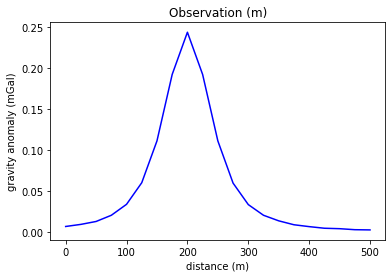

In [2]:
# load data observasi / data lapangan
d_obs = np.loadtxt("DataGravityLapanganJumatLatihan.txt")

# membuat variabel baru
xData = d_obs[:,0]
gData = d_obs[:,1]

# plot data observasi
plt.plot(xData, gData, 'b-')
plt.title("Observation (m)")
plt.xlabel("distance (m)")
plt.ylabel("gravity anomaly (mGal)")
plt.show()

In [3]:
# input paramater
rho = 2.67 # gr/cc
jari = 20 # meter
zSource = 47 # meter
xSource = 200 # meter

In [4]:
# properti stasiun
x0 = 0 # meter
xn = np.max(xData) # meter
nx = xn / len(xData) + 1 # meter

In [5]:
# fungsi forward modeling sphere

def gravsphere(rho, jari, zSource, xSource, x):
    G = 6.67e-11 # konstanta gravitasi universal, SI
    gravity = G*rho*(4/3)*np.pi*(jari**3)*(zSource/(zSource**2 + (xSource-x)**2)**(3/2))*1e8
    
    return gravity

In [6]:
# menghitung gravitasi bola
n = len(xData)

xStasiun = np.zeros(n)
gz = np.zeros(n)
x = np.zeros(n)

for i in range(n):
    x = (i) * nx
    xStasiun[i] = (i) * nx
    gz[i] = gravsphere(rho, jari, zSource, xSource, x)
    
# menghitung misfit
misfit = round(np.sum((gData-gz)**2),4)
misfit

0.0032

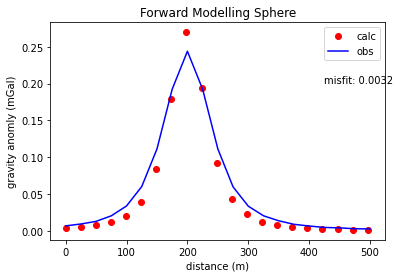

In [7]:
## plot hasil

# data kalkulasi
plt.plot(xStasiun, gz, 'ro')

# data observasi
plt.plot(xData, gData, 'b-')

plt.legend(['calc', 'obs'])
plt.xlabel("distance (m)")
plt.ylabel("gravity anomly (mGal)")
plt.text(425,0.20, f"misfit: {misfit}")
plt.title("Forward Modelling Sphere")
plt.show()

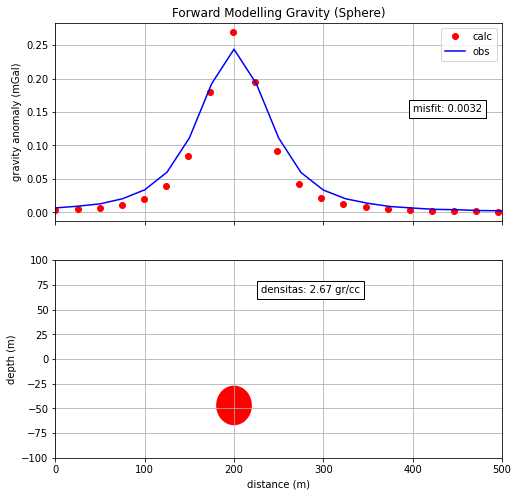

In [8]:
## plot anomaly respons
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

# gravity
ax1.plot(xStasiun, gz, 'ro')
ax1.plot(xData, gData, 'b-')
ax1.set_ylabel("gravity anomaly (mGal)")
ax1.set_xlim(0,500)
ax1.grid()
ax1.legend(['calc', 'obs'])
ax1.set_title("Forward Modelling Gravity (Sphere)")
ax1.text(400,0.15, f"misfit: {misfit}",bbox = dict(facecolor = 'white'))

# Sphere
q = np.linspace(0,2*np.pi,500)

xSphere = jari*np.cos(q)+xSource
zSphere = jari*np.sin(q)-zSource
ax2.set_ylabel("depth (m)")
ax2.set_xlim(0,500)
ax2.set_ylim(-100,100)
ax2.set_xlabel("distance (m)")
ax2.fill(xSphere, zSphere,'r')
ax2.grid()
ax2.text(xSource+30,zSource+20, f"densitas: {rho} gr/cc",bbox = dict(facecolor = 'white'))
plt.show()